In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_full = pd.read_csv('aug_train.csv')
test_full = pd.read_csv('aug_test.csv')

In [3]:
print(train_full.shape,test_full.shape)

(19158, 14) (2129, 13)


In [4]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
#describe generally doesnt give info about string/characters, only calculates the metrics of numerical fields
train_full.describe(include=np.object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


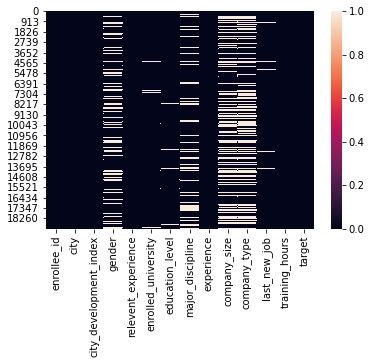

In [6]:
sns.heatmap(train_full.isnull())

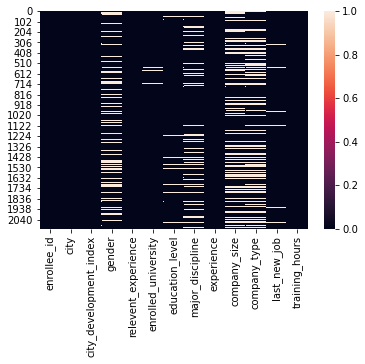

In [7]:
sns.heatmap(test_full.isnull())

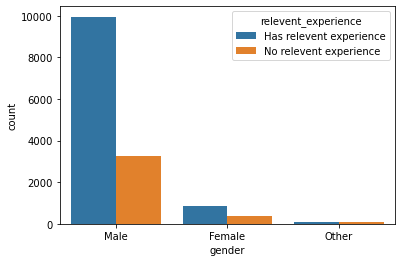

In [8]:
sns.countplot(train_full['gender'],hue=train_full['relevent_experience'])

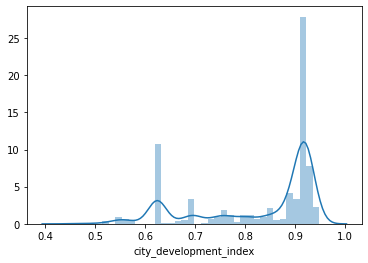

In [9]:
sns.distplot(train_full['city_development_index'])

In [10]:
train_full.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
train_full.shape
#rows 19158
gender_null = 4508/19158*100
major_d_null = 2813/19158*100
company_size_null = 5938/19158*100
company_type_null = 6140/19158*100
print(gender_null,company_size_null,company_type_null,major_d_null)
#since they are all missing over 15% of the data, it is not recommended to include it in model

23.530639941538784 30.994884643490973 32.04927445453596 14.68316108153252


In [12]:
test_full.isnull().sum()
#we will remove the columns from test as well

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

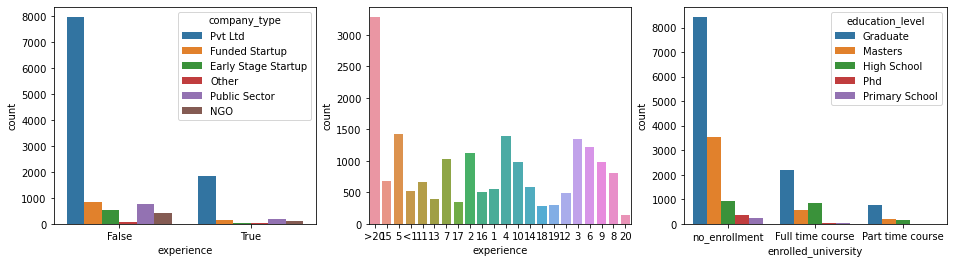

In [13]:
_,vz = plt.subplots(1,3, figsize = (16,4))
sns.countplot(train_full['experience']== '>20', hue = train_full['company_type'], ax=vz[0])
sns.countplot(train_full['experience'], ax=vz[1])
sns.countplot(train_full['enrolled_university'], hue = train_full['education_level'],ax=vz[2])
#we can see most of the people fall under the no_enrolled category, thus the data is skewed in many fields

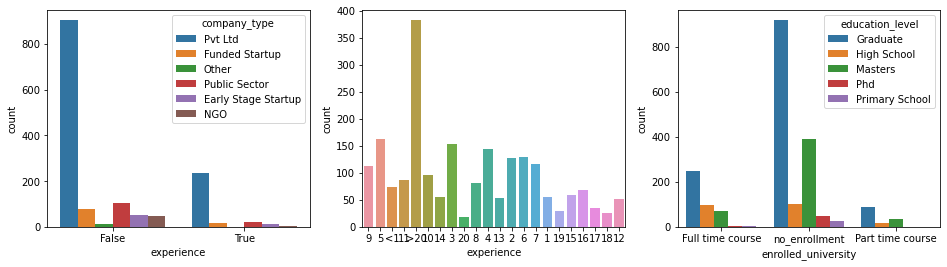

In [14]:
_,vz = plt.subplots(1,3, figsize = (16,4))
sns.countplot(test_full['experience']== '>20', hue = test_full['company_type'], ax=vz[0])
sns.countplot(test_full['experience'], ax=vz[1])
sns.countplot(test_full['enrolled_university'], hue = test_full['education_level'],ax=vz[2])
#we can see most of the people fall under the no_enrolled category, thus the data is skewed in many fields

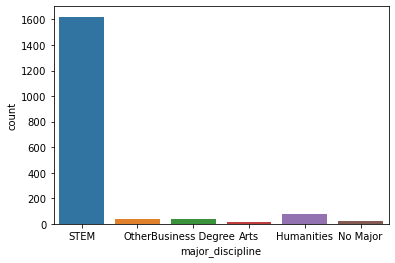

In [15]:
sns.countplot(test_full['major_discipline'])

In [16]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [17]:
train_object = [cols for cols in train_full.columns if train_full[cols].dtypes == object ]

In [18]:
train_object

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [19]:
train_full.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0


In [20]:
train_full_1 = train_full.copy()
test_full = test_full.copy()

In [21]:
train_full_1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [22]:
a = train_full_1.target

In [23]:
a

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [24]:
train_full_1 = train_full_1.drop(['target'],axis=1)

In [25]:
train_full_1.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47


In [26]:
from sklearn.model_selection import train_test_split

#dropping the target column
drop_these = ['gender','major_discipline','company_size','company_type']
#these we have so many null values that imputation will make it worse
train_full_1 = train_full_1.drop(drop_these,axis=1)

X_train_1,X_valid_1,y_train,y_valid = train_test_split(train_full_1,a,test_size=0.2,random_state=0)

categorical_Columns = [cols for cols in X_train_1.columns if X_train_1[cols].nunique() < 10 and 
                      X_train_1[cols].dtype == 'object']

numerical_colums = [cols for cols in X_train_1.columns if X_train_1[cols].dtype in ['int64','float64']]

my_cols = categorical_Columns+numerical_colums
X_train = X_train_1[my_cols].copy()
X_valid = X_valid_1[my_cols].copy()
X_test = test_full[my_cols].copy()

In [27]:
my_cols

['relevent_experience',
 'enrolled_university',
 'education_level',
 'last_new_job',
 'enrollee_id',
 'city_development_index',
 'training_hours']

In [28]:
X_train.head(2)

,relevent_experience,enrolled_university,education_level,last_new_job,enrollee_id,city_development_index,training_hours
19147,No relevent experience,Full time course,Graduate,1,21319,0.624,52
8464,Has relevent experience,Full time course,Graduate,NaN,1980,0.624,92


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix,classification_report, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

#for numerical columns imputing
numerical_imp = SimpleImputer(strategy='most_frequent')

#for categorical imputing and onehotencoding
categorical_imp = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

#bundling these steps
preprocessing = ColumnTransformer(transformers=[
    ('num',numerical_imp,numerical_colums),
    ('cat',categorical_imp,categorical_Columns)
])

#model
model = RandomForestRegressor(n_estimators=500)

#model pipeline
rfm = Pipeline(steps=[
    ('preprocess',preprocessing),
    ('model',model)
])


#preprocessing and fitting of training data
rfm.fit(X_train,y_train)

#preprocessing and fpredicting the validation data
preds = rfm.predict(X_valid)

#metric MAE
print('MAE:', mean_absolute_error(y_valid,preds))
print('accuracy score:', accuracy_score(y_valid,preds.round(), normalize=None))
print('confusion matrix:', confusion_matrix(y_valid,preds.round(), normalize=None))
#print('report: ', classification_report(y_valid,preds.round(), normalize=None))
print('MSqE:', mean_squared_error(y_valid,preds))

MAE: 0.31482985386221296
accuracy score: 2921
confusion matrix: [[2600  282]
 [ 629  321]]
MSqE: 0.17143140292275572


In [30]:
classification_report(y_valid,preds.round())

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.90      0.85      2882\n         1.0       0.53      0.34      0.41       950\n\n    accuracy                           0.76      3832\n   macro avg       0.67      0.62      0.63      3832\nweighted avg       0.74      0.76      0.74      3832\n'

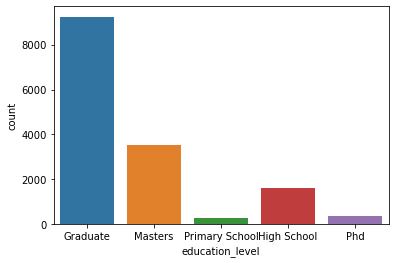

In [31]:
sns.countplot(X_train['education_level'])

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15326 entries, 19147 to 2732
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   relevent_experience     15326 non-null  object 
 1   enrolled_university     15010 non-null  object 
 2   education_level         14957 non-null  object 
 3   last_new_job            14991 non-null  object 
 4   enrollee_id             15326 non-null  int64  
 5   city_development_index  15326 non-null  float64
 6   training_hours          15326 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB
